# Risk Factors :

Sob a perspectiva de evitar fazer cálculos desnecessários, aumentando o risco de erros de validação, e tratamento dos dados de mercado, foram utilizados o conjunto de dados a respeito dos Fatores fornecidos pelo *NEFIN* : https://nefin.com.br/data/risk_factors.html . O conjunto de dados é dividido em 6 arquivos separados, desde $02$ de Janeiro de 2001

In case there is an error in the read_excel of ".xls" files:

In [35]:
# When using pip3, to correctly install the packages, use the following command:
# pip3 install -r requirements.txt

### Library

In [36]:
# Initial Imports:
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



# To run models:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from joblib import dump, load
# Import Linear Regression Model from SKLearn:
from sklearn.linear_model import LinearRegression

# For visualizations:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Project files
from evaluation import *
from portfolio import *

### Data 

In [37]:
factors = pd.read_csv('../data/risk_factors/factors.csv',index_col='date')

### Functions:

In [38]:
stock = choose_stock("ITUB3")

Index(['data', 'fech_ajustado', 'variacao(pct)', 'fech_historico',
       'abertura_ajustado', 'min_ajustado', 'medio_ajustado', 'max_ajustado',
       'vol_(mm_r$)', 'negocios', 'fator', 'tipo', 'quant_em_aluguel',
       'vol_em_aluguel(mm_r$)'],
      dtype='object')


In [39]:
stock.head(20)

,fech_ajustado,variacao(pct),fech_historico,abertura_ajustado,min_ajustado,medio_ajustado,max_ajustado,vol_(mm_r$),negocios,fator,tipo,quant_em_aluguel,vol_em_aluguel(mm_r$)
date,,,,,,,,,,,,,
2001/01/02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001/01/03,0.929065,NaN,185.0,0.929065,0.929065,0.929065,0.929065,0.00555,1.0,1000.0,ON *EJ,NaN,NaN
2001/01/04,0.949153,2.162162,189.0,0.949153,0.949153,0.949153,0.949153,0.02268,1.0,1000.0,ON *EJ,NaN,NaN
2001/01/05,0.949153,0.000000,189.0,0.949153,0.949153,0.949153,0.949153,0.01701,3.0,1000.0,ON *EJ,NaN,NaN
2001/01/08,0.949153,0.000000,189.0,0.949153,0.949153,0.949153,0.949153,0.12474,2.0,1000.0,ON *EJ,NaN,NaN
2001/01/09,0.949153,0.000000,189.0,0.954175,0.949153,0.949454,0.954175,0.03025,2.0,1000.0,ON *EJ,NaN,NaN
2001/01/10,0.949153,0.000000,189.0,0.949153,0.949153,0.949153,0.949153,0.06993,5.0,1000.0,ON *EJ,NaN,NaN
2001/01/11,0.949153,0.000000,189.0,0.949153,0.949153,0.949153,0.949153,0.12285,2.0,1000.0,ON *EJ,NaN,NaN
2001/01/12,0.949153,0.000000,189.0,0.949153,0.949153,0.949153,0.949153,0.23625,3.0,1000.0,ON *,NaN,NaN


In [40]:
stock_prepared = process_stock(stock)

In [41]:
stock_prepared.head()

,Close,Returns
date,,
2001/01/04,0.949153,2.162162
2001/01/05,0.949153,0.000000
2001/01/08,0.949153,0.000000
2001/01/09,0.949153,0.000000
2001/01/10,0.949153,0.000000


In [42]:
stock.columns

Index(['fech_ajustado', 'variacao(pct)', 'fech_historico', 'abertura_ajustado',
       'min_ajustado', 'medio_ajustado', 'max_ajustado', 'vol_(mm_r$)',
       'negocios', 'fator', 'tipo', 'quant_em_aluguel',
       'vol_em_aluguel(mm_r$)'],
      dtype='object')

In [43]:
# concatenating two Dataframes:
combined_df = merge_portifolio(stock_prepared, factors)

In [44]:
combined_df.loc[combined_df["Returns"] == 0]

,mkt-rf,HML,IML,SMB,WML,Close,Returns
date,,,,,,,
2001/01/05,-0.012839,-0.002397,0.025124,0.003523,0.005985,0.949153,0.0
2001/01/08,0.003982,0.001948,-0.001175,0.007883,-0.004099,0.949153,0.0
2001/01/09,0.019986,-0.000916,-0.003978,0.005928,0.009564,0.949153,0.0
2001/01/10,-0.004368,0.012468,0.022134,0.013150,-0.000691,0.949153,0.0
2001/01/11,0.004694,-0.003454,-0.002278,-0.010816,-0.003061,0.949153,0.0
...,...,...,...,...,...,...,...
2022/08/23,0.016765,-0.001593,-0.001424,0.004395,-0.016007,21.502694,0.0
2022/10/05,0.005149,-0.000664,0.011139,0.011128,-0.000794,23.876673,0.0
2022/11/14,0.006756,-0.011804,-0.000838,-0.002178,-0.004111,21.982954,0.0


## Split Train / Test Method:


In order to preserve the temporal order of the data:

In [45]:
# Calling function to split data:
X_train, X_test, y_train, y_test,close_test = split_data(combined_df,rate=0.8)

## Make predictions:

In [46]:
lin_reg_model = LinearRegression(fit_intercept=True)
lin_reg_model = lin_reg_model.fit(X_train, y_train)
predictions = lin_reg_model.predict(X_test)

In [47]:
# Convert y_test to a dataframe:
y_test = y_test.to_frame()

In [48]:
signals_df = y_test.copy()

# Add "predictions" to dataframe:
y_test['Predictions'] = predictions
y_test["Close"]=close_test

# Add "Buy Signal" column based on whether day's predictions were greater than the day's actual returns:
y_test['Buy Signal'] = np.where(y_test['Predictions'] > y_test['Returns'], 1.0,0.0)

# Drop nulls:
y_test=y_test.dropna()

y_test.head()


,Returns,Predictions,Close,Buy Signal
date,,,,
2019/02/08,2.951444,0.696286,20.834628,0.0
2019/02/11,-1.418002,-0.547074,20.539193,1.0
2019/02/12,1.626016,1.432179,20.873163,0.0
2019/02/13,-2.153846,-0.291501,20.423587,1.0
2019/02/14,2.798742,1.789381,20.995191,0.0


In [49]:
y_test.head(10)

,Returns,Predictions,Close,Buy Signal
date,,,,
2019/02/08,2.951444,0.696286,20.834628,0.0
2019/02/11,-1.418002,-0.547074,20.539193,1.0
2019/02/12,1.626016,1.432179,20.873163,0.0
2019/02/13,-2.153846,-0.291501,20.423587,1.0
2019/02/14,2.798742,1.789381,20.995191,0.0
2019/02/15,-0.244723,-0.328707,20.943811,0.0
2019/02/18,-1.441276,-0.653413,20.641953,1.0
2019/02/19,2.053516,0.966254,21.065839,0.0
2019/02/20,-0.884146,-0.950801,20.879586,0.0


In [50]:
# Generate and view signals dataframe using generate signals function
signals_df=generate_signals(y_test)
display(signals_df.head())

,Returns,Predictions,Close,Buy Signal,Position,Entry/Exit,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
date,,,,,,,,,,,,
2019/02/08,2.951444,0.696286,20.834628,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019/02/11,-1.418002,-0.547074,20.539193,1.0,2000.0,1.0,2000.0,41078.385370,58921.614630,100000.000000,NaN,NaN
2019/02/12,1.626016,1.432179,20.873163,0.0,0.0,-1.0,-2000.0,0.000000,100667.941225,100667.941225,0.006679,0.006679
2019/02/13,-2.153846,-0.291501,20.423587,1.0,2000.0,1.0,2000.0,40847.174946,59820.766280,100667.941225,0.000000,0.006679
2019/02/14,2.798742,1.789381,20.995191,0.0,0.0,-1.0,-2000.0,0.000000,101811.148323,101811.148323,0.011356,0.018111


In [51]:

display(algo_evaluation(signals_df))
# Generate Metrics for Function vs. Buy-and-Hold Strategy:
display(algo_vs_underlying(signals_df))
# Generate Evaluation table:
trade_evaluation_df=trade_evaluation(signals_df)
display(trade_evaluation_df)


,Backtest
Annual Return,-0.034562
Cumulative Returns,-0.150206
Annual Volatility,0.096056
Sharpe Ratio,-0.359807
Sortino Ratio,-0.505031


,Algo,Underlying
Annual Return,-0.034562,6.505461
Cumulative Returns,-0.150206,10393648083174646874112.0
Annual Volatility,0.096056,29.74162
Sharpe Ratio,-0.359807,0.218733
Sortino Ratio,-0.505031,0.315673


,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,2019/02/11,2019/02/12,2000.0,20.539193,20.873163,100000.000000,100667.941225,667.941225
1,2019/02/13,2019/02/14,2000.0,20.423587,20.995191,100667.941225,101811.148323,1143.207097
2,2019/02/18,2019/02/19,2000.0,20.641953,21.065839,101811.148323,102658.919878,847.771556
3,2019/02/25,2019/02/28,2000.0,21.452356,21.119709,102658.919878,101993.625298,-665.294581
4,2019/03/01,2019/03/07,2000.0,20.885385,21.170649,101993.625298,102564.152881,570.527583
...,...,...,...,...,...,...,...,...
252,2023/04/06,2023/04/10,2000.0,20.733421,20.903285,83160.811576,83500.539915,339.728339
253,2023/04/13,2023/04/14,2000.0,21.672670,21.982422,83500.539915,84120.044533,619.504618
254,2023/04/17,2023/04/18,2000.0,21.922470,21.922470,84120.044533,84120.044533,0.000000
255,2023/04/19,2023/04/25,2000.0,21.552765,21.602726,84120.044533,84219.964632,99.920100


## ANOVA Table / Other Visualizations for 3-Factor Models:

### ATT

In [52]:
# To run models:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from joblib import dump, load

In [53]:
# Set X and y variables:
y = combined_df.loc[:, 'Returns']
X = combined_df.drop('Returns', axis=1)
X = X.drop('Close',axis=1)

# Add "Constant" column of "1s" to DataFrame to act as an intercept, using StatsModels:
X = sm.add_constant(X)

# Split into Training/Testing data:
split = int(0.8 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

# Run Ordinary Least Squares (OLS )Model:
model = sm.OLS(y_test, X_test)
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          5.73e-225
Time:                        13:38:55   Log-Likelihood:                -1618.8
No. Observations:                1049   AIC:                             3250.
Df Residuals:                    1043   BIC:                             3279.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0237      0.035      0.671      0.5

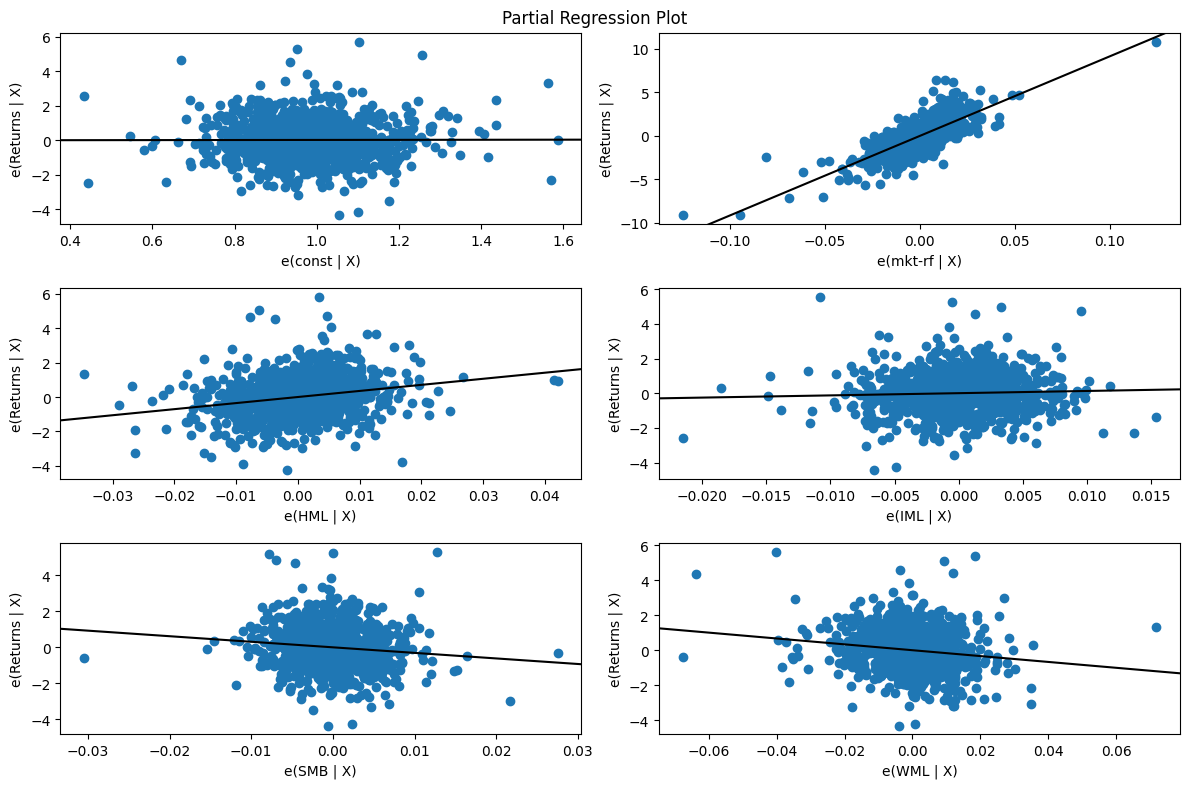

In [54]:
# Plot Partial Regression Plot:
fig = sm.graphics.plot_partregress_grid(model_results, fig = plt.figure(figsize=(12,8)))
plt.show()

<Axes: >

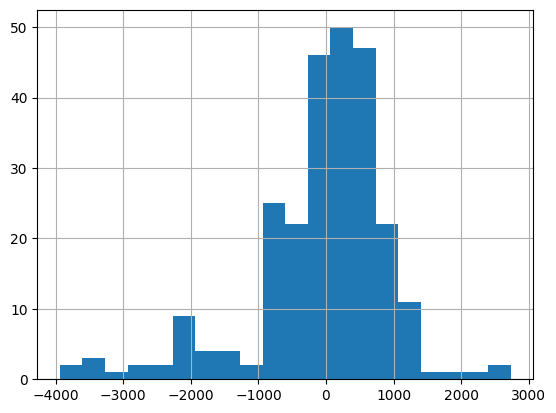

In [55]:

# Plot P&L Histrogram:
trade_evaluation_df["Profit/Loss"].hist(bins=20)



In [56]:
trade_evaluation_df.head()


,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,2019/02/11,2019/02/12,2000.0,20.539193,20.873163,100000.000000,100667.941225,667.941225
1,2019/02/13,2019/02/14,2000.0,20.423587,20.995191,100667.941225,101811.148323,1143.207097
2,2019/02/18,2019/02/19,2000.0,20.641953,21.065839,101811.148323,102658.919878,847.771556
3,2019/02/25,2019/02/28,2000.0,21.452356,21.119709,102658.919878,101993.625298,-665.294581
4,2019/03/01,2019/03/07,2000.0,20.885385,21.170649,101993.625298,102564.152881,570.527583


In [57]:
trade_evaluation_df.tail()

,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
252,2023/04/06,2023/04/10,2000.0,20.733421,20.903285,83160.811576,83500.539915,339.728339
253,2023/04/13,2023/04/14,2000.0,21.672670,21.982422,83500.539915,84120.044533,619.504618
254,2023/04/17,2023/04/18,2000.0,21.922470,21.922470,84120.044533,84120.044533,0.000000
255,2023/04/19,2023/04/25,2000.0,21.552765,21.602726,84120.044533,84219.964632,99.920100
256,2023/04/26,2023/04/27,2000.0,21.432861,21.812558,84219.964632,84979.357389,759.392757


<Axes: xlabel='date'>

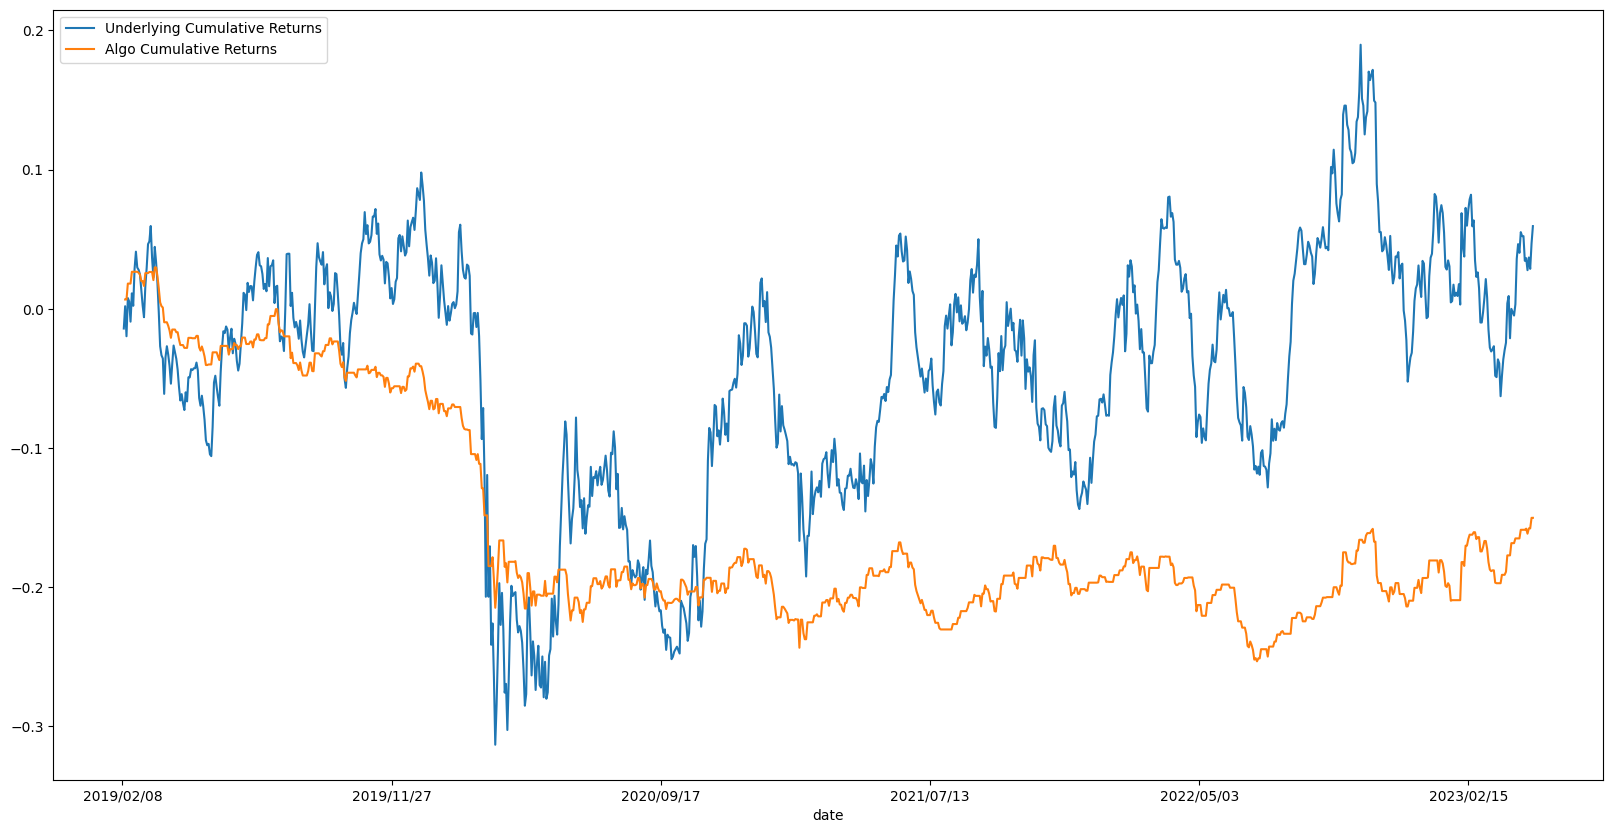

In [58]:
# Generate Cumulative Return plot using above defined function:
underlying_returns(signals_df).plot(figsize=(20,10))

# VALE3


In [59]:
ticker = "VALE3"
stock = choose_stock(ticker)
stock.head()

Index(['data', 'fech_ajustado', 'variacao(pct)', 'fech_historico',
       'abertura_ajustado', 'min_ajustado', 'medio_ajustado', 'max_ajustado',
       'vol_(mm_r$)', 'negocios', 'fator', 'tipo', 'quant_em_aluguel',
       'vol_em_aluguel(mm_r$)'],
      dtype='object')


,fech_ajustado,variacao(pct),fech_historico,abertura_ajustado,min_ajustado,medio_ajustado,max_ajustado,vol_(mm_r$),negocios,fator,tipo,quant_em_aluguel,vol_em_aluguel(mm_r$)
date,,,,,,,,,,,,,
2001/01/02,1.231650,NaN,43.2,1.231650,1.231650,1.231650,1.231650,0.11664,4.0,1.0,ON EJ,NaN,NaN
2001/01/03,1.311480,6.481481,46.0,1.225948,1.217395,1.249612,1.311480,1.27553,26.0,1.0,ON EJ,NaN,NaN
2001/01/04,1.268714,-3.260870,44.5,1.311480,1.254459,1.279548,1.311480,0.74963,15.0,1.0,ON EJ,NaN,NaN
2001/01/05,1.254459,-1.123596,44.0,1.254459,1.254459,1.254459,1.254459,0.18480,5.0,1.0,ON EJ,NaN,NaN
2001/01/08,1.240204,-1.136364,43.5,1.254459,1.225948,1.231365,1.254459,0.55725,17.0,1.0,ON EJ,NaN,NaN


In [60]:
stock_prepared = process_stock(stock)
stock_prepared.head()

,Close,Returns
date,,
2001/01/03,1.311480,6.481481
2001/01/04,1.268714,-3.260870
2001/01/05,1.254459,-1.123596
2001/01/08,1.240204,-1.136364
2001/01/09,1.254459,1.149425


In [61]:
# concatenating two Dataframes:
combined_df = merge_portifolio(stock_prepared, factors)
combined_df.head()

,mkt-rf,HML,IML,SMB,WML,Close,Returns
date,,,,,,,
2001/01/03,0.062427,0.009390,0.004510,0.005390,-0.028644,1.311480,6.481481
2001/01/04,-0.000310,-0.002327,-0.009227,0.006690,-0.000946,1.268714,-3.260870
2001/01/05,-0.012839,-0.002397,0.025124,0.003523,0.005985,1.254459,-1.123596
2001/01/08,0.003982,0.001948,-0.001175,0.007883,-0.004099,1.240204,-1.136364
2001/01/09,0.019986,-0.000916,-0.003978,0.005928,0.009564,1.254459,1.149425


In [62]:
X_train, X_test, y_train, y_test,close_test = split_data(combined_df,rate=0.8)

In [63]:
# Create, train, and predict model:
lin_reg_model = LinearRegression(fit_intercept=True)
lin_reg_model = lin_reg_model.fit(X_train, y_train)
predictions = lin_reg_model.predict(X_test)

In [64]:
# Convert y_test to a dataframe:
y_test = y_test.to_frame()

In [65]:
signals_df = y_test.copy()

# Add "predictions" to dataframe:
y_test['Predictions'] = predictions
y_test["Close"]=close_test

# Add "Buy Signal" column based on whether day's predictions were greater than the day's actual returns:
y_test['Buy Signal'] = np.where(y_test['Predictions'] > y_test['Returns'], 1.0,0.0)

# Drop nulls:
y_test=y_test.dropna()

y_test.head()

,Returns,Predictions,Close,Buy Signal
date,,,,
2018/11/13,2.588879,-0.775187,39.934587,0.0
2018/11/14,-1.972632,1.576905,39.146825,1.0
2018/11/16,1.794779,2.644305,39.849424,1.0
2018/11/19,-1.389136,-0.503726,39.295861,1.0
2018/11/21,-1.517067,-0.669729,38.699716,1.0


In [66]:
# Generate signals Dataframe using generate signals function
signals_df=generate_signals(y_test)
# Generate Metrics table for Algorithm:
display(algo_evaluation(signals_df))
# Generate Metrics table for Algorithm vs. Buy-and-Hold Strategy:
display(algo_vs_underlying(signals_df))
# Generate Metrics table for Stock using pre-defined function:
trade_evaluation_df=trade_evaluation(signals_df)
display(trade_evaluation_df)

,Backtest
Annual Return,0.017312
Cumulative Returns,-0.095061
Annual Volatility,0.280773
Sharpe Ratio,0.061659
Sortino Ratio,0.083601


,Algo,Underlying
Annual Return,0.017312,22.892856
Cumulative Returns,-0.095061,6733300422129638889507074469472346925084672874...
Annual Volatility,0.280773,41.690199
Sharpe Ratio,0.061659,0.549118
Sortino Ratio,0.083601,0.808453


,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,2018/11/14,2018/11/26,2000.0,39.146825,35.569957,100000.000000,92846.265532,-7153.734468
1,2018/11/27,2018/11/28,2000.0,35.428018,37.117095,92846.265532,96224.417919,3378.152388
2,2018/11/29,2018/11/30,2000.0,36.904186,37.471942,96224.417919,97359.931327,1135.513408
3,2018/12/04,2018/12/10,2000.0,37.528718,35.626733,97359.931327,93555.961411,-3803.969916
4,2018/12/12,2018/12/14,2000.0,35.747381,36.109326,93555.961411,94279.851209,723.889797
...,...,...,...,...,...,...,...,...
269,2023/03/21,2023/03/29,2000.0,82.710000,80.510000,113613.890431,109213.890431,-4400.000000
270,2023/03/30,2023/04/03,2000.0,81.820000,80.310000,109213.890431,106193.890431,-3020.000000
271,2023/04/04,2023/04/10,2000.0,78.040000,78.230000,106193.890431,106573.890431,380.000000
272,2023/04/12,2023/04/18,2000.0,80.600000,78.540000,106573.890431,102453.890431,-4120.000000


In [67]:
# Set X and y variables:
y = combined_df.loc[:, 'Returns']
X = combined_df.drop('Returns', axis=1)
X = X.drop('Close',axis=1)

# Add "Constant" column of "1s" to DataFrame to act as an intercept, using StatsModels:
X = sm.add_constant(X)

# Split into Training/Testing data:
split = int(0.8 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

# Run Ordinary Least Squares (OLS )Model:
model = sm.OLS(y_test, X_test)
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.65e-121
Time:                        13:39:00   Log-Likelihood:                -2347.3
No. Observations:                1105   AIC:                             4707.
Df Residuals:                    1099   BIC:                             4737.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0560      0.062      0.909      0.3

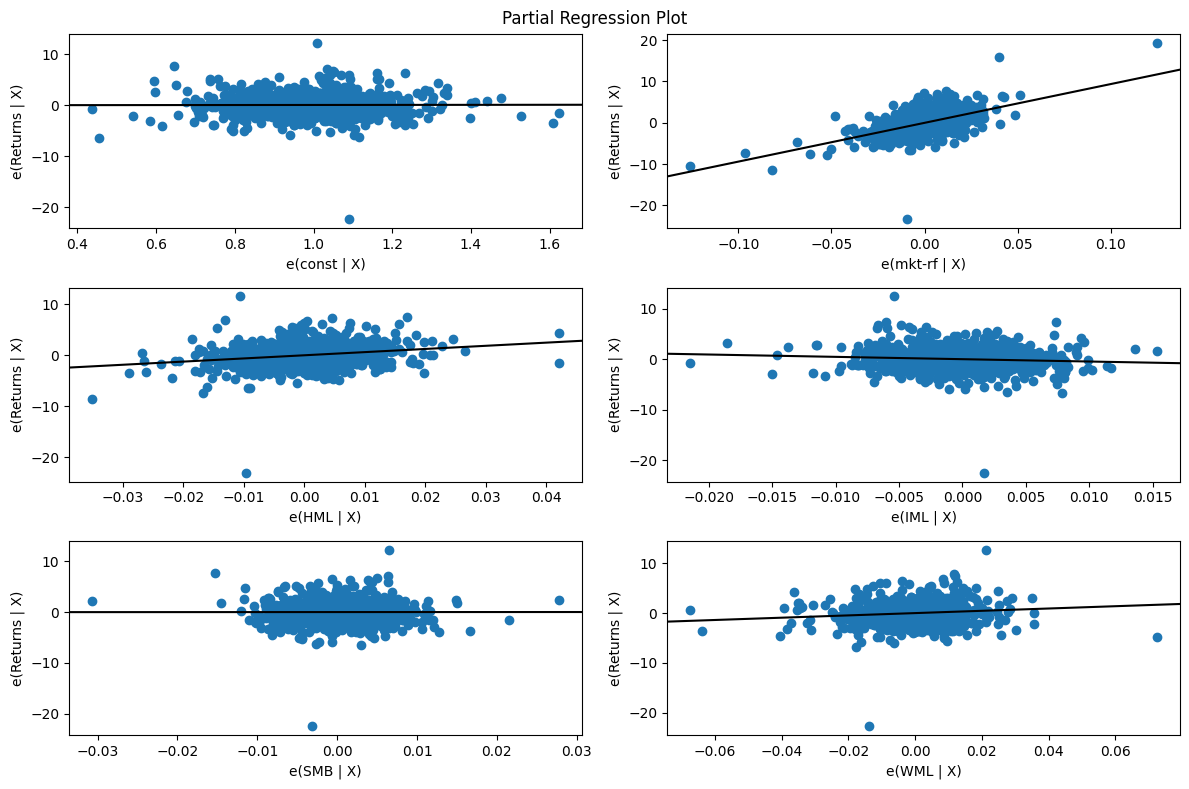

<Axes: xlabel='date'>

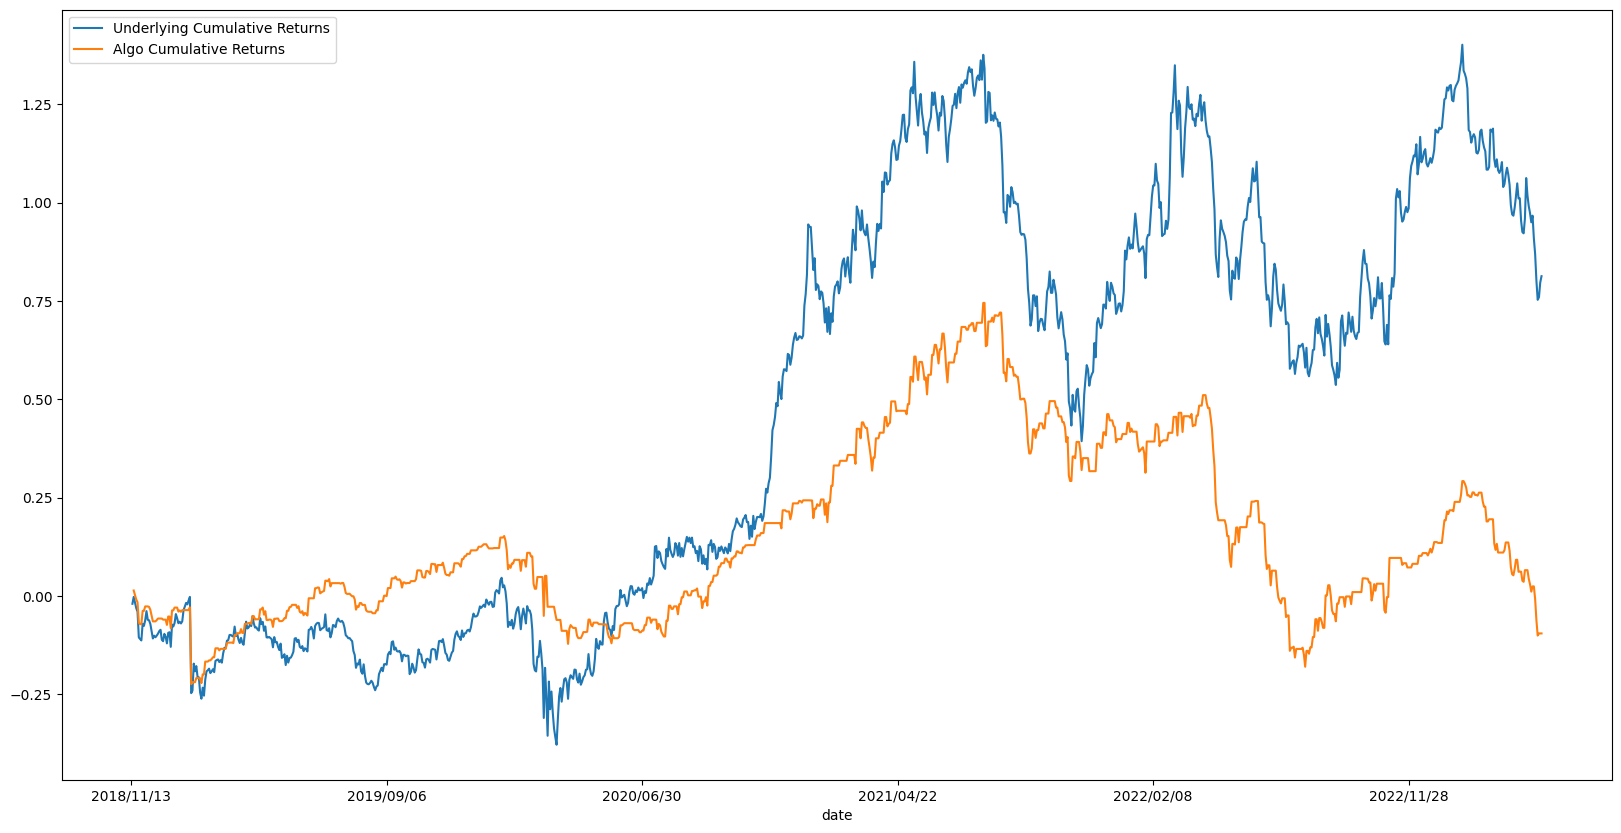

In [68]:
# Plot Partial Regression Plot:
fig = sm.graphics.plot_partregress_grid(model_results, fig = plt.figure(figsize=(12,8)))
plt.show()
# Plot Cumulative Returns:
underlying_returns(signals_df).plot(figsize=(20,10))
